<a href="https://colab.research.google.com/github/PatriciaMPSOliveira/Dicionario/blob/main/Atividade_Pr%C3%A1tica_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comandos para realização do trabalho de NLP com uso da biblioteca SKlearn e NLTK.


## Carregando arquivos `Fake.Br`, de imagem e de funções auxiliares para dentro do Google Colab

In [1]:
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


--2024-07-14 19:12:18--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.06s   

2024-07-14 19:12:18 (317 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 31.04 MiB/s, done.
Resolving deltas: 100% (9/9), done.


## Instalação manual das dependências para uso do SKlearn e do NLTK no Google Colab

In [2]:
import pandas as pd
import nltk
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

## Criar dataframe do CSV utilizando o método read_csv do pandas

In [3]:
# Carregar o dataset
df = pd.read_csv('pre-processed.csv')


# PRÁTICA 1 - CRIAÇÃO DE MODELO DE CLASSIFICAÇÃO SUPERVISIONADO PARA ANÁLISE DE FAKE NEWS.

1. Realize os seguintes procedimentos de limpeza dos textos do dataframe criado:

  1.1. Tokenizar

  1.2. Retirar os acentos e números

  1.3. Deixar tudo em minúsculas

  1.4. Retirar as stopwords e pontuações

  1.5. Deixar palavras apenas com radical (STEM)

  1.6. Realizar truncamento dos pares de notícias verdadeiras com falsas para normalizar quantidade de palavras

  1.7. Remontar as notícias em string e criar coluna no dataframe para o resultado deste pré-processamento.

2. Criar matriz de frequências TF-IDF com ngramas de 1 a 3 palavras.

3. Usar a função train_test_split do Scikit Learn para dividir o corpus pré-tratado em 75% dos textos para treinamento e 25% para testes de precisão (usar random_state = 42 ou outro número de sua escolha).

4. Fazer regressão logística com solver = 'lbfgs'.

5. Realizar predição dos textos de teste com o método predict_proba, que retornará a porcentagem predita para fake e para real em um array.

6. Por fim, com as porcentagens calculadas para cada texto de teste, usar a função accuracy_score da biblioteca Scikit Learn para calcular a acurácia geral do algoritmo.

In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string


# Função para remover acentos
def remove_accented_chars(text):
    text = re.sub(r'[áàâãäå]', 'a', text)
    text = re.sub(r'[éèêë]', 'e', text)
    text = re.sub(r'[íìîï]', 'i', text)
    text = re.sub(r'[óòôõö]', 'o', text)
    text = re.sub(r'[úùûü]', 'u', text)
    text = re.sub(r'[ç]', 'c', text)
    return text

# Função de pré-processamento dos textos
def preprocess_text(text):
    # 1. Tokenizar
    tokens = word_tokenize(text)
    # 2. Remover acentos e números
    tokens = [remove_accented_chars(token) for token in tokens if token.isalpha()]
    # 3. Deixar em minúsculas
    tokens = [token.lower() for token in tokens]
    # 4. Remover stopwords e pontuações
    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # 5. Deixar palavras apenas com radical (STEM)
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

# Ajustar de acordo com o nome correto da coluna
df['cleaned_text'] = df['preprocessed_news'].apply(preprocess_text)

print(df[['preprocessed_news', 'cleaned_text']].head())




                                   preprocessed_news  \
0  katia abreu diz vai colocar expulsao moldura n...   
1  ray peita bolsonaro conservador fake entrevist...   
2  reinaldo azevedo desmascarado policia federal ...   
3  relatorio assustador bndes mostra dinheiro pub...   
4  radialista americano fala sobre pt vendem ilus...   

                                        cleaned_text  
0  kat abr diz vai coloc expulsa mold nao reclam ...  
1  ray peit bolsonar conserv fak entrev danil gen...  
2  reinald azeved desmascar polic feder ferrenh c...  
3  relatori assust bnd mostr dinh publ brasil jor...  
4  radial americ fal sobr pt vend ilusa pov brasi...  


## QUESTÃO 01: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos VERDADEIROS.

1. Formate seus dados usados para o treinamento do seu modelo em um dicionário de tokens e suas frequências.
2. Separe os dados em um grupo com textos marcados como verdadeiros e outro com os falsos.
3. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

Palavras mais frequentes nos textos verdadeiros:
[('nao', 35892), ('sao', 9608), ('tambem', 9531), ('lula', 8748), ('presidente', 8730), ('sobre', 8302), ('disse', 8183), ('anos', 8173), ('federal', 7648), ('ja', 7603)]


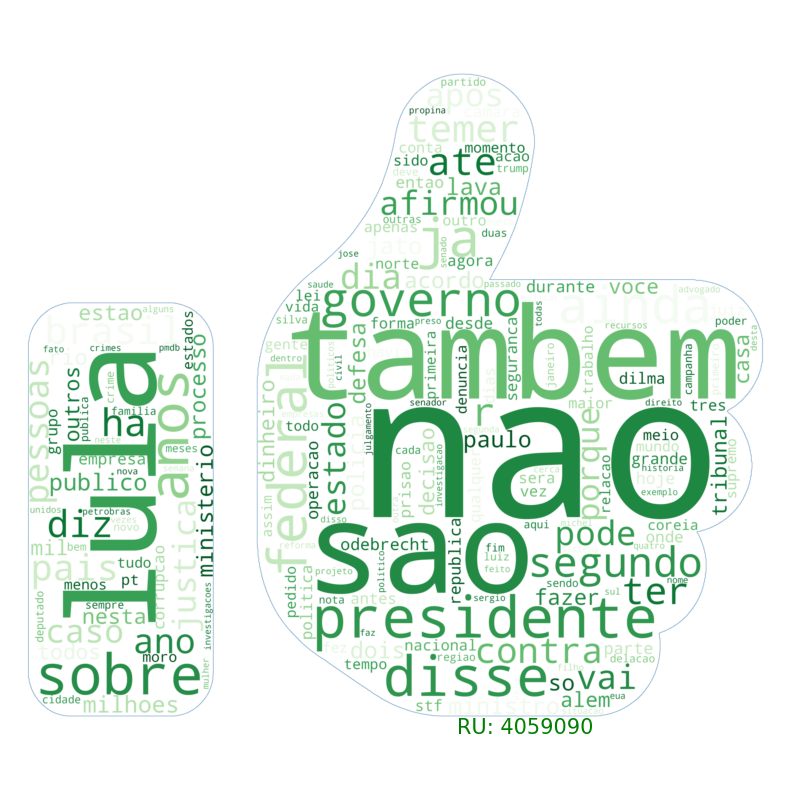

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Função para extrair tokens e suas frequências
def extrair_tokens_e_frequencias(textos):
    tokens = []
    stop_words = set(stopwords.words('portuguese'))

    for texto in textos:
        if isinstance(texto, str):
            tokens.extend([token.lower() for token in word_tokenize(texto)
            if token.isalpha() and token.lower() not in stop_words])

    freq_dist = nltk.FreqDist(tokens)
    return freq_dist

# Ajustar labels para 'true' e 'fake'
textos_verdadeiros = df[df['label'] == 'true']['preprocessed_news']
textos_falsos = df[df['label'] == 'fake']['preprocessed_news']

# Verificar se a lista de textos verdadeiros não está vazia
if len(textos_verdadeiros) == 0:
    print("Nenhum texto verdadeiro encontrado no dataframe.")
else:
    # Extrair tokens e frequências dos textos verdadeiros
    dic_frequencias_verdadeiras = extrair_tokens_e_frequencias(textos_verdadeiros)

    # Converter FreqDist em dicionário simples de palavras e frequências
    dic_verdadeiras = dict(dic_frequencias_verdadeiras)

    # Função para gerar nuvem de palavras com identificador e tons de verde
    def gerar_nuvem_palavras(dicionario_tokens_e_frequencia, imagem_mascara, identificador):
        # Carregar a imagem de máscara
        mask = np.array(Image.open(imagem_mascara))

        # Criar a nuvem de palavras com a máscara e tonalidades de verde
        wordcloud = WordCloud(
            width=1600,
            height=800,
            background_color='white',
            mask=mask,
            contour_width=3,
            contour_color='steelblue',
            colormap='Greens'
        ).generate_from_frequencies(dicionario_tokens_e_frequencia)

        # Adicionar identificador à nuvem de palavras
        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')

        # Ajustar posição do identificador dentro da máscara
        plt.text(2900, 4600, identificador, fontsize=15, color='green', verticalalignment='top')

        plt.show()

    # Caminho para a imagem de máscara
    imagem = '/mascara/thumbs_up.png'

    # Identificador para incluir na nuvem de palavras
    identificador = "RU: 4059090"

    # Chama a função para gerar a nuvem de palavras com identificador
    gerar_nuvem_palavras(dic_verdadeiras, imagem, identificador)

In [24]:
# Vetorização dos textos falsos
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_verdadeiras = vectorizer.fit_transform(textos_verdadeiros)

# Extração de termos, bigramas e trigramas
terms = vectorizer.get_feature_names_out()
frequencies = X_verdadeiras.toarray().sum(axis=0)

# Criar um DataFrame com os termos e suas frequências
terms_df = pd.DataFrame({'term': terms, 'frequency': frequencies})
terms_df = terms_df.sort_values(by='frequency', ascending=False)

# Separar em unigrams, bigrams e trigrams
unigrams = terms_df[terms_df['term'].str.split().str.len() == 1]
bigrams = terms_df[terms_df['term'].str.split().str.len() == 2]
trigrams = terms_df[terms_df['term'].str.split().str.len() == 3]

# Imprimir o número de unigrams, bigrams e trigrams
print(f"Total de palavras (unigrams): {len(unigrams)}")
print(f"Total de bigramas: {len(bigrams)}")
print(f"Total de trigramas: {len(trigrams)}")


Total de palavras (unigrams): 74422
Total de bigramas: 1310501
Total de trigramas: 1927003


## QUESTÃO 02: Apresente aqui o código referente ao modelo gerado e a nuvem de palavras que foram usadas para identificar textos FALSOS.

1. Use a função gerar_nuvem_palavras(dic_de_frequências_textos_verdadeiras, imagem de sua escolha) para gerar a nuvem de palavras

Palavras mais frequentes nos textos falsos:
[('nao', 6229), ('lula', 3059), ('disse', 2200), ('dilma', 1861), ('presidente', 1843), ('tambem', 1580), ('ja', 1468), ('brasil', 1413), ('sao', 1393), ('pais', 1292)]


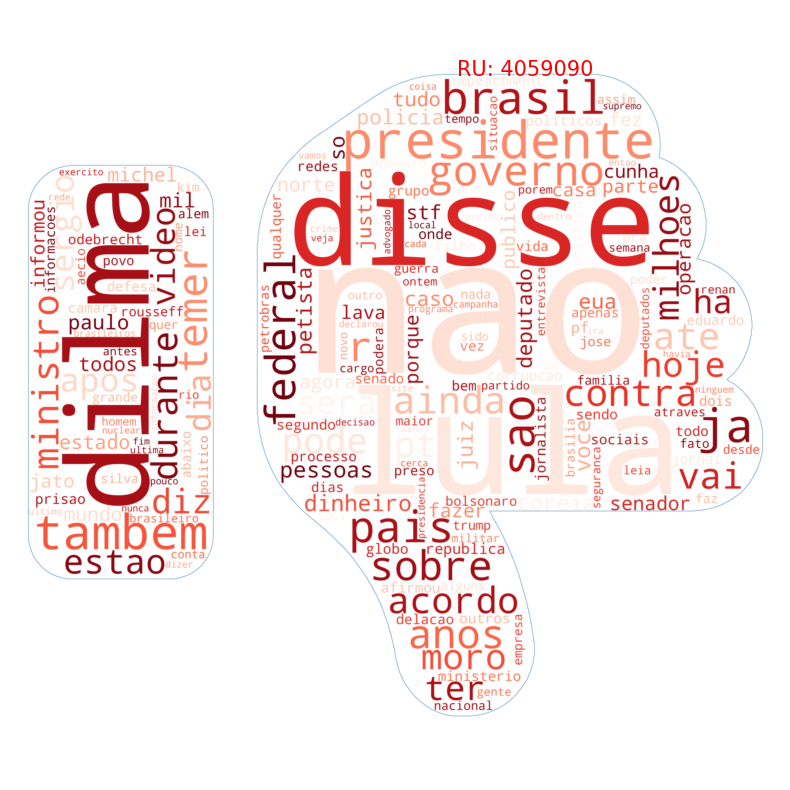

In [21]:
# Verificar se a lista de textos falsos não está vazia
if len(textos_falsos) == 0:
    print("Nenhum texto falso encontrado no dataframe.")
else:
    # Extrair tokens e frequências dos textos falsos
    dic_frequencias_falsas = extrair_tokens_e_frequencias(textos_falsos)

    # Converter FreqDist em dicionário simples de palavras e frequências
    dic_falsas = dict(dic_frequencias_falsas)

    # Função para gerar nuvem de palavras com identificador
    def gerar_nuvem_palavras(dicionario_tokens_e_frequencia, imagem_mascara, identificador):
        # Carregar a imagem de máscara
        mask = np.array(Image.open(imagem_mascara))

        # Criar a nuvem de palavras com a máscara e tonalidades de vermelho
        wordcloud = WordCloud(
            width=1600,
            height=800,
            background_color='white',
            mask=mask,
            contour_width=3,
            contour_color='steelblue',
            colormap='Reds'
        ).generate_from_frequencies(dicionario_tokens_e_frequencia)

        # Adicionar identificador à nuvem de palavras
        plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        # Posição e estilo do identificador
        plt.text(2900, 390, identificador, fontsize=15, color='red', verticalalignment='center')
        plt.show()

    # Caminho para a imagem de máscara
    imagem_de_sua_escolha = '/mascara/thumbs_down.png'

    # Identificador para incluir na nuvem de palavras
    identificador = "RU: 4059090"

    # Chama a função para gerar a nuvem de palavras com identificador
    gerar_nuvem_palavras(dic_falsas, imagem_de_sua_escolha, identificador)

## Quantidade de palavras, bigramas e trigramas foram usados dos textos rotulados como FAKE para a criação do modelo

In [23]:
# Vetorização dos textos falsos
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_falsos = vectorizer.fit_transform(textos_falsos)

# Extração de termos, bigramas e trigramas
terms = vectorizer.get_feature_names_out()
frequencies = X_falsos.toarray().sum(axis=0)

# Criar um DataFrame com os termos e suas frequências
terms_df = pd.DataFrame({'term': terms, 'frequency': frequencies})
terms_df = terms_df.sort_values(by='frequency', ascending=False)

# Separar em unigrams, bigrams e trigrams
unigrams = terms_df[terms_df['term'].str.split().str.len() == 1]
bigrams = terms_df[terms_df['term'].str.split().str.len() == 2]
trigrams = terms_df[terms_df['term'].str.split().str.len() == 3]

# Imprimir o número de unigrams, bigrams e trigrams
print(f"Total de palavras (unigrams): {len(unigrams)}")
print(f"Total de bigramas: {len(bigrams)}")
print(f"Total de trigramas: {len(trigrams)}")


Total de palavras (unigrams): 31750
Total de bigramas: 275425
Total de trigramas: 351783
